In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Kmeans알고리즘의 inertia
- Kmeans를 통해 클러스터 중심과 클러스터에 속한 샘플 사이의 거리 도출 가능
  - 이 거리의 제곱의 합을 이너셔(inertia)라고 한다.
- 이너셔(inertia)는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로, 잘 된 클러스터링일수록 inertia 감소
  - 일반적으로 클러스터의 개수가 늘어날수록 이너셔(inertia)값 감소
- elbow 방법이 클러스터의 개수의 변화에 따른 inertia의 변화를 통해 최적의 클러스터 개수를 찾는 방법
  - elbow point를 최적의 클러스터 수로 잡는 이유는 더 이상 inertia가 눈에 띄게 작아지지 않기 때문이다

# 데이터 불러오기

이번 과제에서는 Iris data를 이용하여 분석해볼 것이다.

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris_X = iris.data[:,:2]
iris_y = iris.target

# 데이터 시각화

Text(0, 0.5, 'Sepal Width')

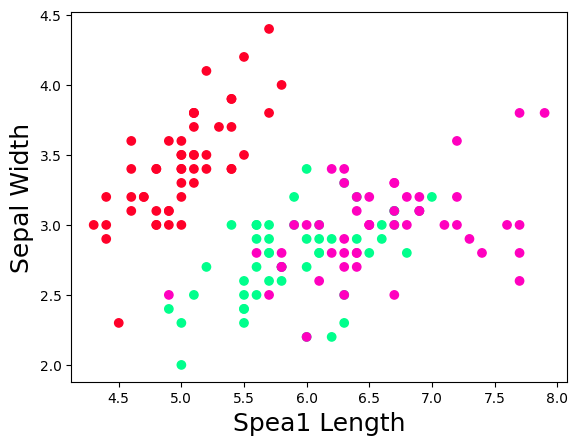

In [ ]:
plt.scatter(iris_X[:,0], iris_X[:,1], c=iris_y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

# 모델 학습
- n_clusters : k-means의 k를 의미하는 군집형성의 개수
-  n_jobs :  scikit-learn의 기본적인 병렬처리로 내부적으로 멀티프로세스를 사용
  - 만약 CPU 코어의 수가 충분하다면 n_jobs를 늘릴수록 속도가 증가  

- random_state : 학습결과의 동일성을 위해서 난수 고정

-  n_init : 초기 중앙점이 무작위로 선택되기므로 가장 나은 결과를 얻기 위한 초기값 변경 횟수 

- max_iter : 학습의 최대 반복횟수 

- tol : max_iter의 반복횟수를 계속 하면 너무 많은 시간이 소요되기에, inertia가 지정해준 tol만큼 줄어들지 않으면 조기에 종료

In [ ]:
kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(iris_X)

KMeans(init='random', n_clusters=2, n_init=10, random_state=0)

In [ ]:
centers = kmeans.cluster_centers_
print('군집의 중심점 좌표')
print(centers)
print()
print("inertia")
print(kmeans.inertia_)

군집의 중심점 좌표
[[5.22409639 3.1313253 ]
 [6.61044776 2.96567164]]

inertia
58.204092789066735


# Elbow point를 이용한 최적의 K값 도출
- K=2 일때 이후로 줄어드는 inertia의 간격이 적어지는 것을 확인할 수 있다. 따라서 K=2 로 하는 것이 가장 좋아보인다.

군집의 개수가 1~11일때 각각의 inertia
[130.4752666666667, 58.204092789066735, 37.05070212765956, 28.011149160808458, 21.254077540106962, 17.41068621166415, 14.756476273726271, 12.920957911341537, 11.205202485686357, 9.931189102564108]


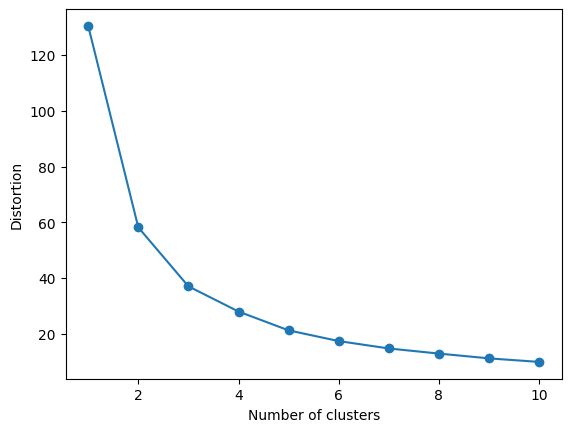

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(iris_X)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

print('군집의 개수가 1~11일때 각각의 inertia')
print(distortions)
# plot - 급격하게 줄어드는 부분
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# 적절한 K를 사용한 결과 시각화
- 군집의 좌표를 파란색으로 표시하여 나타내보면 다음과 같다
- K=2일때 보면 결과가 그렇게 좋아보이지는 않는다. 따라서 K=3 일때도 시도해보고자 한다

Text(0, 0.5, 'Sepal Width')

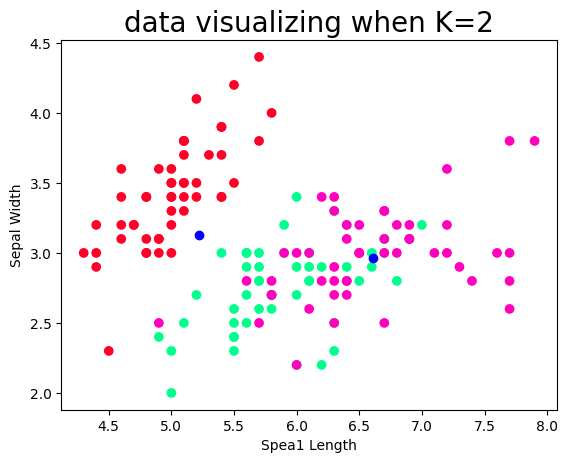

In [ ]:
plt.scatter(iris_X[:,0], iris_X[:,1], c=iris_y, cmap='gist_rainbow')
plt.scatter(centers[:,0], centers[:,1], c = 'b')
plt.title("data visualizing when K=2", fontsize = 20)
plt.xlabel('Spea1 Length', fontsize=10)
plt.ylabel('Sepal Width', fontsize=10)

아래는 K=3일때의 시각화 결과이다
- 개인적으로 K=2일때보다 3일 때 더 좋은 결과를 도출하는 것으로 보인다.
- 따라서 elbow point로 적절한 K값을 도출할 때는 적절해 보이는 K값 근처의 값들로도 시각화 해보면 좋을 듯하다.

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(iris_X)
centers = kmeans.cluster_centers_

Text(0, 0.5, 'Sepal Width')

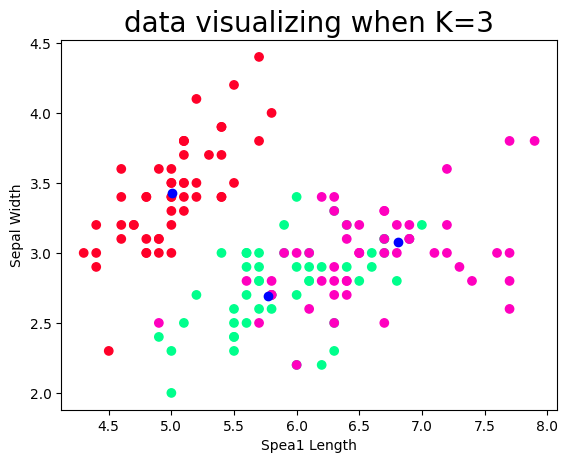

In [ ]:
plt.scatter(iris_X[:,0], iris_X[:,1], c=iris_y, cmap='gist_rainbow')
plt.scatter(centers[:,0], centers[:,1], c = 'b')
plt.title("data visualizing when K=3", fontsize = 20)
plt.xlabel('Spea1 Length', fontsize=10)
plt.ylabel('Sepal Width', fontsize=10)